# Day 1: Modern Portfolio Theory
## Week 5: Portfolio Optimization

---

**Learning Objectives:**
- Understand Markowitz mean-variance optimization
- Calculate portfolio expected return and variance
- Construct the efficient frontier
- Find the minimum variance portfolio

In [1]:
# Day 1 Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

# Constants
TRADING_DAYS = 252
RF_RATE = 0.05

# Load data
df = pd.read_csv('../datasets/raw_data/combined_adjusted_close.csv', 
                 index_col='Date', parse_dates=True)

# Select diverse assets
assets = ['AAPL', 'MSFT', 'JPM', 'XOM', 'GLD', 'TLT']
prices = df[assets].dropna()
returns = prices.pct_change().dropna()

print("=" * 60)
print("MODERN PORTFOLIO THEORY - DAY 1")
print("=" * 60)
print(f"Assets: {assets}")
print(f"Period: {prices.index[0].date()} to {prices.index[-1].date()}")
print(f"Observations: {len(returns)}")

MODERN PORTFOLIO THEORY - DAY 1
Assets: ['AAPL', 'MSFT', 'JPM', 'XOM', 'GLD', 'TLT']
Period: 2019-01-02 to 2026-01-16
Observations: 1770


## 1. Portfolio Return and Risk

For a portfolio with weights $w$:
- **Expected Return**: $\mu_p = w^T \mu$
- **Variance**: $\sigma_p^2 = w^T \Sigma w$

In [2]:
# Calculate expected returns and covariance matrix
print("=" * 60)
print("ASSET STATISTICS")
print("=" * 60)

# Annualized statistics
mean_returns = returns.mean() * TRADING_DAYS
cov_matrix = returns.cov() * TRADING_DAYS
std_returns = returns.std() * np.sqrt(TRADING_DAYS)
corr_matrix = returns.corr()

print("\n📊 Annualized Statistics:")
stats_df = pd.DataFrame({
    'Expected Return': mean_returns,
    'Volatility': std_returns,
    'Sharpe Ratio': (mean_returns - RF_RATE) / std_returns
})
print(stats_df.round(4))

# Correlation matrix
print("\n📊 Correlation Matrix:")
print(corr_matrix.round(3))

ASSET STATISTICS

📊 Annualized Statistics:
      Expected Return  Volatility  Sharpe Ratio
AAPL           0.3212      0.3100        0.8746
MSFT           0.2653      0.2833        0.7601
JPM            0.2364      0.2989        0.6236
XOM            0.1836      0.3117        0.4286
GLD            0.1897      0.1577        0.8860
TLT           -0.0058      0.1643       -0.3398

📊 Correlation Matrix:
       AAPL   MSFT    JPM    XOM    GLD    TLT
AAPL  1.000  0.699  0.421  0.297  0.071 -0.088
MSFT  0.699  1.000  0.428  0.241  0.071 -0.102
JPM   0.421  0.428  1.000  0.544 -0.031 -0.282
XOM   0.297  0.241  0.544  1.000  0.064 -0.236
GLD   0.071  0.071 -0.031  0.064  1.000  0.254
TLT  -0.088 -0.102 -0.282 -0.236  0.254  1.000


In [3]:
# Portfolio calculations
print("=" * 60)
print("PORTFOLIO CALCULATIONS")
print("=" * 60)

def portfolio_return(weights, mean_returns):
    """Calculate portfolio expected return."""
    return np.dot(weights, mean_returns)

def portfolio_volatility(weights, cov_matrix):
    """Calculate portfolio volatility (std dev)."""
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def portfolio_sharpe(weights, mean_returns, cov_matrix, rf_rate=RF_RATE):
    """Calculate portfolio Sharpe ratio."""
    ret = portfolio_return(weights, mean_returns)
    vol = portfolio_volatility(weights, cov_matrix)
    return (ret - rf_rate) / vol

# Example: Equal weight portfolio
n_assets = len(assets)
equal_weights = np.array([1/n_assets] * n_assets)

print("\n📊 Equal Weight Portfolio:")
print(f"  Weights: {dict(zip(assets, equal_weights.round(4)))}")
print(f"  Expected Return: {portfolio_return(equal_weights, mean_returns):.2%}")
print(f"  Volatility: {portfolio_volatility(equal_weights, cov_matrix):.2%}")
print(f"  Sharpe Ratio: {portfolio_sharpe(equal_weights, mean_returns, cov_matrix):.4f}")

PORTFOLIO CALCULATIONS

📊 Equal Weight Portfolio:
  Weights: {'AAPL': np.float64(0.1667), 'MSFT': np.float64(0.1667), 'JPM': np.float64(0.1667), 'XOM': np.float64(0.1667), 'GLD': np.float64(0.1667), 'TLT': np.float64(0.1667)}
  Expected Return: 19.84%
  Volatility: 15.36%
  Sharpe Ratio: 0.9663


## 2. Random Portfolios

Generate random portfolios to visualize the feasible region.

In [4]:
# Generate random portfolios
print("=" * 60)
print("RANDOM PORTFOLIO SIMULATION")
print("=" * 60)

n_portfolios = 10000

# Store results
port_returns = []
port_volatilities = []
port_sharpes = []
port_weights = []

for _ in range(n_portfolios):
    # Random weights that sum to 1
    weights = np.random.random(n_assets)
    weights /= weights.sum()
    
    # Calculate metrics
    ret = portfolio_return(weights, mean_returns)
    vol = portfolio_volatility(weights, cov_matrix)
    sharpe = (ret - RF_RATE) / vol
    
    port_returns.append(ret)
    port_volatilities.append(vol)
    port_sharpes.append(sharpe)
    port_weights.append(weights)

# Create dataframe
portfolios = pd.DataFrame({
    'Return': port_returns,
    'Volatility': port_volatilities,
    'Sharpe': port_sharpes
})

# Find best Sharpe portfolio
max_sharpe_idx = portfolios['Sharpe'].idxmax()
min_vol_idx = portfolios['Volatility'].idxmin()

print(f"\n📊 Best Sharpe Portfolio (Random):")
print(f"  Return: {portfolios.loc[max_sharpe_idx, 'Return']:.2%}")
print(f"  Volatility: {portfolios.loc[max_sharpe_idx, 'Volatility']:.2%}")
print(f"  Sharpe: {portfolios.loc[max_sharpe_idx, 'Sharpe']:.4f}")

print(f"\n📊 Minimum Volatility Portfolio (Random):")
print(f"  Return: {portfolios.loc[min_vol_idx, 'Return']:.2%}")
print(f"  Volatility: {portfolios.loc[min_vol_idx, 'Volatility']:.2%}")

RANDOM PORTFOLIO SIMULATION

📊 Best Sharpe Portfolio (Random):
  Return: 23.29%
  Volatility: 15.09%
  Sharpe: 1.2124

📊 Minimum Volatility Portfolio (Random):
  Return: 12.16%
  Volatility: 10.43%


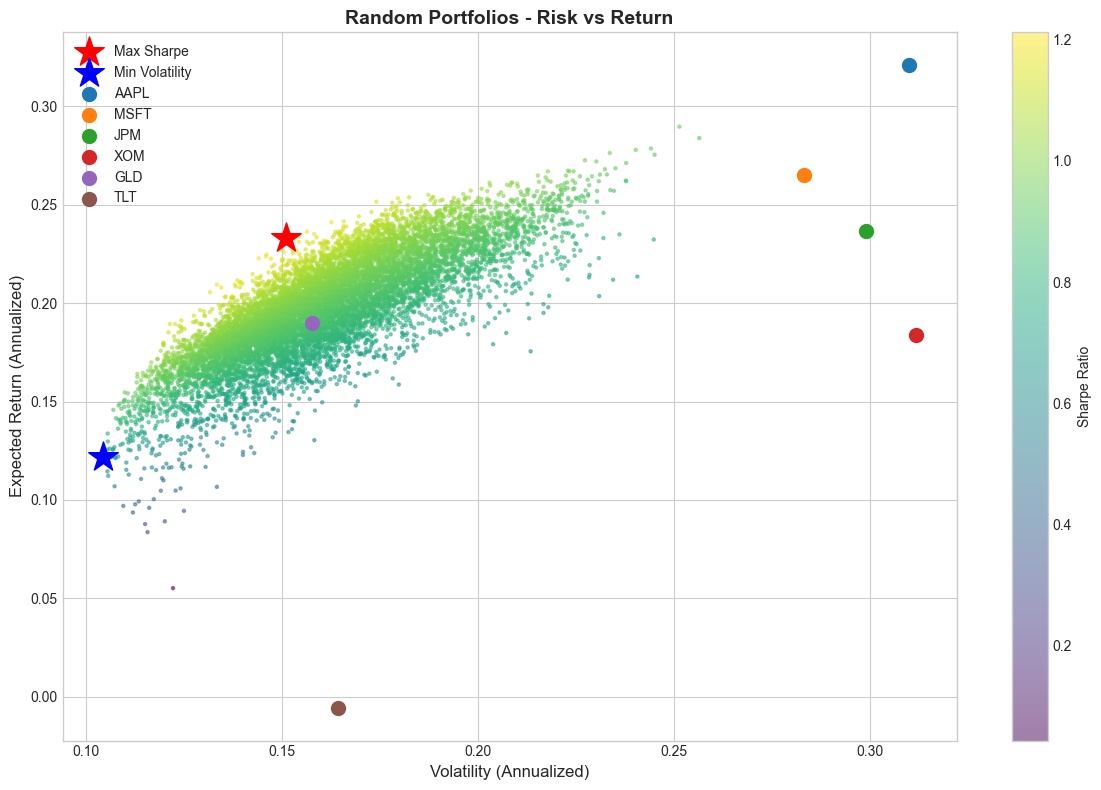

In [5]:
# Plot random portfolios
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot colored by Sharpe ratio
scatter = ax.scatter(portfolios['Volatility'], portfolios['Return'],
                     c=portfolios['Sharpe'], cmap='viridis', alpha=0.5, s=5)

# Mark best portfolios
ax.scatter(portfolios.loc[max_sharpe_idx, 'Volatility'],
           portfolios.loc[max_sharpe_idx, 'Return'],
           marker='*', s=500, c='red', label='Max Sharpe')

ax.scatter(portfolios.loc[min_vol_idx, 'Volatility'],
           portfolios.loc[min_vol_idx, 'Return'],
           marker='*', s=500, c='blue', label='Min Volatility')

# Plot individual assets
for i, asset in enumerate(assets):
    ax.scatter(std_returns[asset], mean_returns[asset], 
               marker='o', s=100, label=asset)

plt.colorbar(scatter, label='Sharpe Ratio')
ax.set_xlabel('Volatility (Annualized)', fontsize=12)
ax.set_ylabel('Expected Return (Annualized)', fontsize=12)
ax.set_title('Random Portfolios - Risk vs Return', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 3. Optimization: Minimum Variance Portfolio

In [6]:
# Minimum variance portfolio
print("=" * 60)
print("MINIMUM VARIANCE PORTFOLIO")
print("=" * 60)

def neg_sharpe(weights, mean_returns, cov_matrix, rf_rate):
    return -portfolio_sharpe(weights, mean_returns, cov_matrix, rf_rate)

# Constraints and bounds
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # weights sum to 1
bounds = tuple((0, 1) for _ in range(n_assets))  # no short selling
initial_weights = equal_weights.copy()

# Minimize volatility
min_vol_result = minimize(
    portfolio_volatility,
    initial_weights,
    args=(cov_matrix,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

min_vol_weights = min_vol_result.x

print("\n📊 Minimum Variance Portfolio (Optimized):")
print("  Weights:")
for asset, weight in zip(assets, min_vol_weights):
    if weight > 0.01:
        print(f"    {asset}: {weight:.2%}")

print(f"\n  Expected Return: {portfolio_return(min_vol_weights, mean_returns):.2%}")
print(f"  Volatility: {portfolio_volatility(min_vol_weights, cov_matrix):.2%}")
print(f"  Sharpe Ratio: {portfolio_sharpe(min_vol_weights, mean_returns, cov_matrix):.4f}")

MINIMUM VARIANCE PORTFOLIO

📊 Minimum Variance Portfolio (Optimized):
  Weights:
    MSFT: 6.96%
    JPM: 11.86%
    XOM: 7.40%
    GLD: 30.45%
    TLT: 42.81%

  Expected Return: 11.70%
  Volatility: 10.33%
  Sharpe Ratio: 0.6487


## 4. Optimization: Maximum Sharpe Portfolio

In [7]:
# Maximum Sharpe portfolio
print("=" * 60)
print("MAXIMUM SHARPE PORTFOLIO")
print("=" * 60)

max_sharpe_result = minimize(
    neg_sharpe,
    initial_weights,
    args=(mean_returns, cov_matrix, RF_RATE),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

max_sharpe_weights = max_sharpe_result.x

print("\n📊 Maximum Sharpe Portfolio (Optimized):")
print("  Weights:")
for asset, weight in zip(assets, max_sharpe_weights):
    if weight > 0.01:
        print(f"    {asset}: {weight:.2%}")

print(f"\n  Expected Return: {portfolio_return(max_sharpe_weights, mean_returns):.2%}")
print(f"  Volatility: {portfolio_volatility(max_sharpe_weights, cov_matrix):.2%}")
print(f"  Sharpe Ratio: {portfolio_sharpe(max_sharpe_weights, mean_returns, cov_matrix):.4f}")

MAXIMUM SHARPE PORTFOLIO

📊 Maximum Sharpe Portfolio (Optimized):
  Weights:
    AAPL: 20.04%
    MSFT: 6.59%
    JPM: 13.04%
    GLD: 60.33%

  Expected Return: 22.71%
  Volatility: 14.12%
  Sharpe Ratio: 1.2547


## 5. Efficient Frontier

EFFICIENT FRONTIER


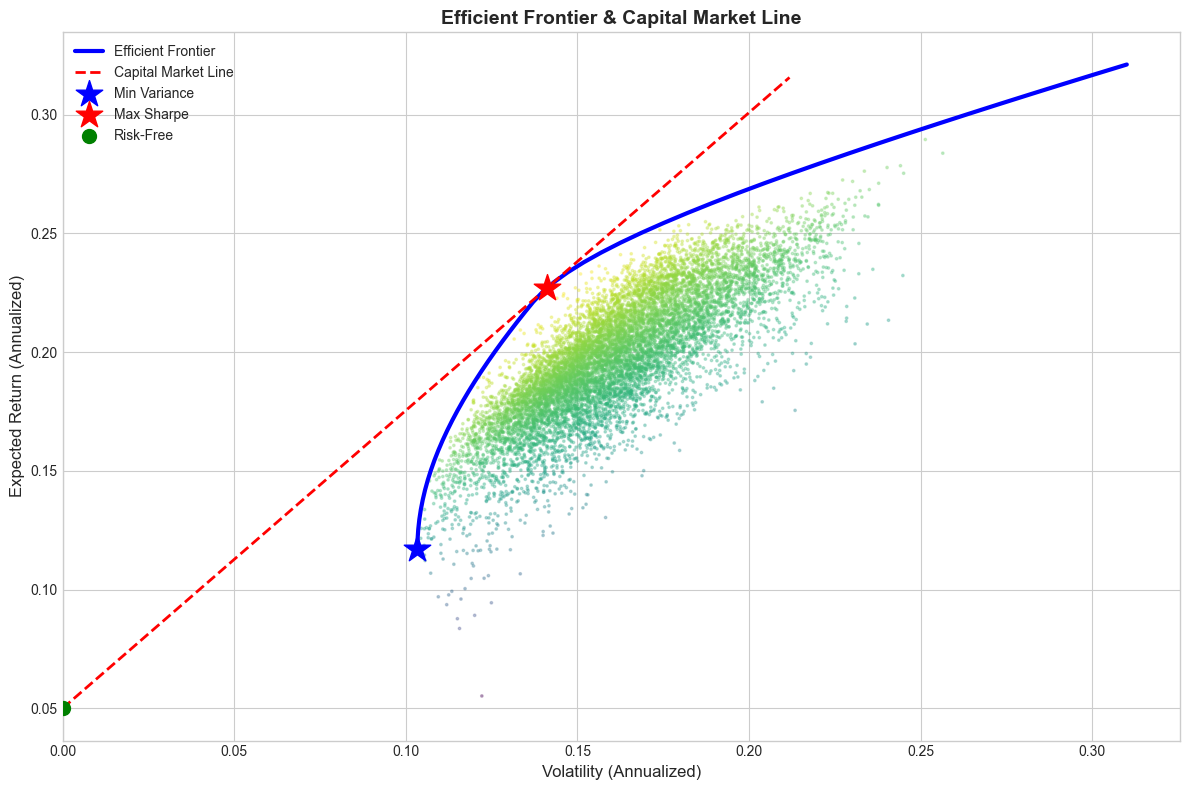

In [8]:
# Efficient frontier
print("=" * 60)
print("EFFICIENT FRONTIER")
print("=" * 60)

def efficient_portfolio(target_return, mean_returns, cov_matrix):
    """Find minimum variance portfolio for a given target return."""
    n = len(mean_returns)
    
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # weights sum to 1
        {'type': 'eq', 'fun': lambda x: portfolio_return(x, mean_returns) - target_return}
    ]
    
    bounds = tuple((0, 1) for _ in range(n))
    
    result = minimize(
        portfolio_volatility,
        np.array([1/n] * n),
        args=(cov_matrix,),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    
    return result.x, result.fun

# Generate efficient frontier
target_returns = np.linspace(
    portfolio_return(min_vol_weights, mean_returns),
    mean_returns.max(),
    50
)

efficient_volatilities = []
efficient_weights = []

for target in target_returns:
    weights, vol = efficient_portfolio(target, mean_returns, cov_matrix)
    efficient_volatilities.append(vol)
    efficient_weights.append(weights)

# Plot efficient frontier
fig, ax = plt.subplots(figsize=(12, 8))

# Random portfolios
ax.scatter(portfolios['Volatility'], portfolios['Return'],
           c=portfolios['Sharpe'], cmap='viridis', alpha=0.3, s=3)

# Efficient frontier
ax.plot(efficient_volatilities, target_returns, 'b-', linewidth=3, label='Efficient Frontier')

# Capital Market Line
max_sharpe_ret = portfolio_return(max_sharpe_weights, mean_returns)
max_sharpe_vol = portfolio_volatility(max_sharpe_weights, cov_matrix)
cml_x = np.linspace(0, max_sharpe_vol * 1.5, 100)
cml_y = RF_RATE + (max_sharpe_ret - RF_RATE) / max_sharpe_vol * cml_x
ax.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark special portfolios
ax.scatter(portfolio_volatility(min_vol_weights, cov_matrix),
           portfolio_return(min_vol_weights, mean_returns),
           marker='*', s=400, c='blue', zorder=5, label='Min Variance')

ax.scatter(max_sharpe_vol, max_sharpe_ret,
           marker='*', s=400, c='red', zorder=5, label='Max Sharpe')

ax.scatter(0, RF_RATE, marker='o', s=100, c='green', zorder=5, label='Risk-Free')

ax.set_xlabel('Volatility (Annualized)', fontsize=12)
ax.set_ylabel('Expected Return (Annualized)', fontsize=12)
ax.set_title('Efficient Frontier & Capital Market Line', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax.set_xlim(0, None)

plt.tight_layout()
plt.show()

## 📝 Key Takeaways - Day 1

### Markowitz Framework:
- Portfolio return is weighted average of asset returns
- Portfolio variance depends on correlations (diversification benefit!)
- Efficient frontier: Set of optimal risk-return portfolios

### Key Formulas:
- **Portfolio Return**: $\mu_p = \sum w_i \mu_i$
- **Portfolio Variance**: $\sigma_p^2 = \sum_i \sum_j w_i w_j \sigma_{ij}$

### Interview Questions:
- "What is the efficient frontier?"
- "How does correlation affect portfolio risk?"
- "What is the Capital Market Line?"
- "Why is the minimum variance portfolio often preferred?"